<a href="https://colab.research.google.com/github/JaeDoo1034/-/blob/main/%EC%8B%A4%EC%8A%B5_%EB%94%B0%EB%9D%BC%ED%95%98%EA%B8%B0_Reg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#x = [i for i in range(10)]
x = list(range(10))
y = [1,1,2,4,5,7,8,9,9,10]
print(x, len(x))
print(y, len(y))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 10
[1, 1, 2, 4, 5, 7, 8, 9, 9, 10] 10


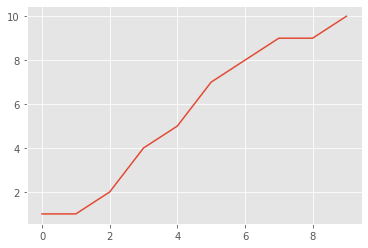

In [19]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [39]:
class H():

  def __init__(self, w):
    self.w = w
  
  def forward(self,x): # Hypothsis
    return self.w * x

def cost(h,x,y):
  error = 0
  for i in range(len(x)):
    error += (h.forward(x[i]) - y[i])**2
  error = error/len(x)
  return error
      
h = H(4)
cost(h,x,y)

222.2

In [40]:
# h class의 w값을 알고 싶을 때
print(h.w)

4


In [54]:
import matplotlib.font_manager as fm
fm._rebuild()

In [58]:
for fontInfo in fm.fontManager.ttflist:
  if "Gothic" in fontInfo.name:
    print(fontInfo.name , fontInfo.fname)

In [52]:
plt.rc('font', family = 'NanumGothic')

w의 리스트 값 : [-10.0, -9.9, -9.8, -9.700000000000001, -9.600000000000001, -9.5, -9.4, -9.3, -9.200000000000001, -9.1, -9.0, -8.9, -8.8, -8.700000000000001, -8.6, -8.5, -8.4, -8.3, -8.200000000000001, -8.1, -8.0, -7.9, -7.800000000000001, -7.7, -7.6000000000000005, -7.5, -7.4, -7.300000000000001, -7.2, -7.1000000000000005, -7.0, -6.9, -6.800000000000001, -6.7, -6.6000000000000005, -6.5, -6.4, -6.300000000000001, -6.2, -6.1000000000000005, -6.0, -5.9, -5.800000000000001, -5.7, -5.6000000000000005, -5.5, -5.4, -5.300000000000001, -5.2, -5.1000000000000005, -5.0, -4.9, -4.800000000000001, -4.7, -4.6000000000000005, -4.5, -4.4, -4.3, -4.2, -4.1000000000000005, -4.0, -3.9000000000000004, -3.8000000000000003, -3.7, -3.6, -3.5, -3.4000000000000004, -3.3000000000000003, -3.2, -3.1, -3.0, -2.9000000000000004, -2.8000000000000003, -2.7, -2.6, -2.5, -2.4000000000000004, -2.3000000000000003, -2.2, -2.1, -2.0, -1.9000000000000001, -1.8, -1.7000000000000002, -1.6, -1.5, -1.4000000000000001, -1.3, -1.200

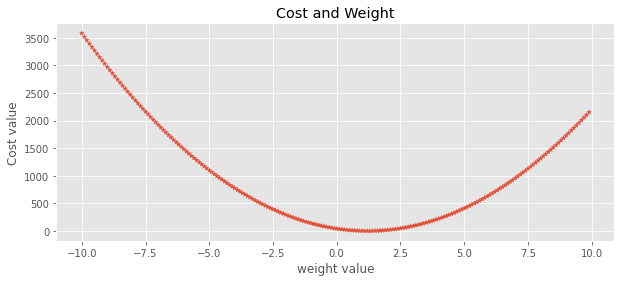

In [67]:
# W가 바뀌면서 cost값이 바뀌는 것을 보자
list_w = []
list_c = []
for i in range(-100,100):
  w = i * 0.1
  h = H(w)
  c = cost(h,x,y)
  list_w.append(w)
  list_c.append(c)
print("w의 리스트 값 : {}".format(list_w))
print("c의 리스트 값 : {}".format(list_c))

plt.figure(figsize = (10,4))
plt.scatter(list_w,list_c, marker = '*',s = [20 for i in range(200)]) # 각각 한개씩 넣을 수도 있고,,
plt.title("Cost and Weight")
plt.xlabel("weight value")
plt.ylabel("Cost value")
plt.show()

No handles with labels found to put in legend.


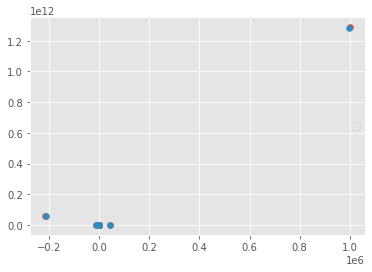

In [110]:
# 수치해석적으로 Gradient 를 구해보자

def cal_grad(w, cost):
  h = H(w)
  cost1 = cost(h,x,y) # w지점에서의 가정 함수식 Cost
  eps = 0.001
  h = H(w+eps)
  cost2 = cost(h,x,y)
  d_cost = cost2 - cost1
  d_w = eps
  grad = d_cost/d_w
  return grad, (cost1 +cost2) * 0.5

# grad(4,cost) # cost를 계산하는 함수를 인자로 넣어준 것임.
# 정확한 표현 방식 : w = w + lr* (-grad)


def cal_grad2(w,cost): # 편미분해서 구하는 것 Go
  h = H(w)
  grad = 0
  for i in range(len(x)):
    grad += 2 * (h.forward(x[i]) - y[i])* x[i] # i번쨰 instance에 대한 grad
  grad = grad / len(x)
  c = cost(h, x, y)
  return grad, c


w1 = 1.4
w2 = 1.4
lr = 0.1


list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(10):
  #w = w + lr* (-cal_grad(w,cost))
  #w -= lr * cal_grad(w,cost)
  #grad, mean_cost = cal_grad(w,cost)
  
  grad1, mean_cost1 = cal_grad(w1,cost)
  grad2, mean_cost2 = cal_grad2(w2,cost)
  # print(grad1, grad2)
  
  w1 -= lr*grad1
  w2 -= lr*grad2

  list_w1.append(w1)
  list_w2.append(w2)
  list_c1.append(mean_cost1)
  list_c2.append(mean_cost2)
  #print(w1, mean_cost1, w2, mean_cost2)


plt.scatter(list_w1, list_c1)
plt.scatter(list_w2, list_c2)
plt.legend(loc = 'right')
plt.show()